# 3-1 선형 회귀(Linear Regression)

In [1]:
#사이킷런에서 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() #diabetes의 자료형은 dictionary와 유사한 Bunch class

In [2]:
#data의 크기 가져오기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
#입력 data 가져오기
diabetes.data[0:3] #[0:3)

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
#타겟 data 가져오기
diabetes.target[:3]

array([151.,  75., 141.])

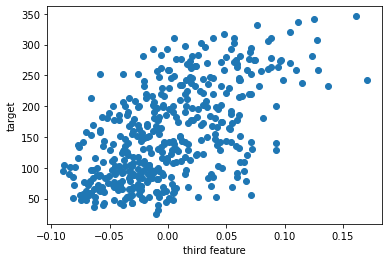

In [5]:
#산점도를 이용한 시각화
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('third feature')
plt.ylabel('target')
plt.show()

# 3-2. 경사 하강법 (Gradient Descent) 

In [6]:
#1. 무작위로 w와 b 초기화
w=1.0
b=1.0

In [7]:
#2. y_hat 계산
x=diabetes.data[:,2]
y=diabetes.target
y_hat=x[0]*w+b
print(y_hat)

1.0616962065186886


In [8]:
#3. y_hat(예측 data)과 y(target)의 비교
print(y[0])

151.0


In [9]:
#4. w,b 조정
w_inc=w+0.1
y_hat_inc=w_inc*x[0]+b
print(y_hat_inc)

1.0678658271705574


In [10]:
#5. w의 증가에 따른 y_hat증가율 (==w의 계수인 x[0])
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
print(w_rate) #w_rate==x[0]

0.061696206518688734


In [11]:
#b의 증가에 따른 y_hat증가율 (==b의 계수)
b_inc=b+0.1
y_hat_inc=x[0]*w+b_inc
b_rate=(y_hat_inc-y_hat)/(b_inc-b)
print(b_rate)

1.0


In [12]:
#backpropagation이용
err=y[0]-y_hat
w_new=w+w_rate*err
b_new=b+1*err
print(w_new,b_new)

10.250624555904514 150.9383037934813


In [13]:
#x[1]을 이용
y_hat_1=x[1]*w_new+b_new
err=y[1]-y_hat_1
w_rate=x[1]
w_new=w_new+w_rate*err
b_new=b_new+1*err
print(w_new,b_new)

14.132317616381767 75.52764127612664


In [14]:
#전체 샘플 반복
for x_i,y_i in zip(x,y):
    y_hat=x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


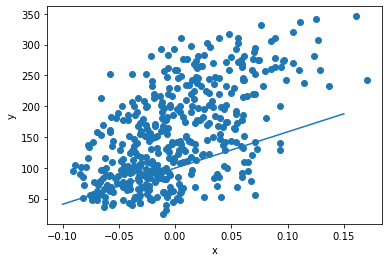

In [15]:
#backpropagation을 이용하여 update한 w, b를 이용한 모델 그리기
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
#여러 에포크 반복
for i in range(1,100):
    for x_i,y_i in zip(x,y):
        y_hat=w*x_i+b
        err=y_i-y_hat
        w=w+err*x_i
        b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


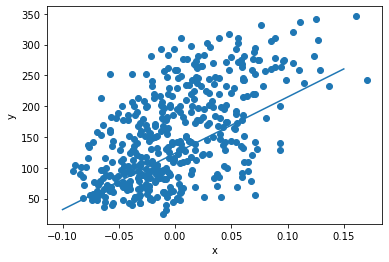

In [17]:
#다시 산점도 + model 그리기
plt.scatter(x,y)
plt.plot([-0.1,0.15],[-0.1*w+b,0.15*w+b])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
#model로 predict
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


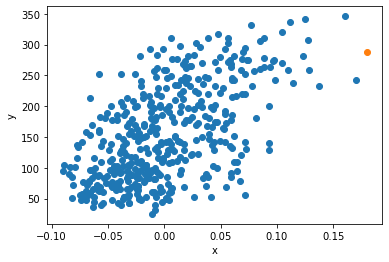

In [19]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3-3. 손실 함수와 경사 하강법의 관계

In [20]:
err=y_i-y_hat
w=w+x_i*err
b=b+1*err

# 3-4. 선형 회귀를 위한 Neuron

In [21]:
#Neuron class 생성
class Neuron:
    def __init__(self):
        self.w=1.0
        self.b=1.0
    def forpass(self,x):
        y_hat=x*self.w+self.b
        return y_hat
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad
    def fit(self,x,y,epochs=100):
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                y_hat=self.forpass(x_i)
                err=y_i-y_hat
                w_grad, b_grad=self.backprop(x_i,err)
                self.w+=w_grad
                self.b+=b_grad

In [22]:
#학습 시켜보기
neuron=Neuron()
neuron.fit(x,y)

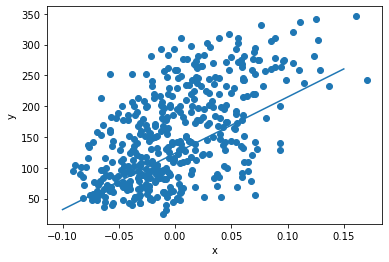

In [24]:
#모델 산점도 그려보기
plt.scatter(x,y)
pt1=(-0.1,-0.1*neuron.w+neuron.b)
pt2=(0.15,0.15*neuron.w+neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()